In [1]:
import json
import pandas as pd
import numpy as np
from seaborn import objects as so
# import the 2 scoring functions
from numerai_tools.scoring import numerai_corr, correlation_contribution

In [3]:
train = pd.read_parquet("../data/v4.3/train_int8.parquet", )

In [5]:
train.head()

,era,data_type,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,...,target_jeremy_v4_20,target_jeremy_v4_60,target_teager_v4_20,target_teager_v4_60,target_agnes_v4_20,target_agnes_v4_60,target_claudia_v4_20,target_claudia_v4_60,target_rowan_v4_20,target_rowan_v4_60
id,,,,,,,,,,,,,,,,,,,,,
n003bba8a98662e4,0001,train,4,2,4,4,0,0,4,4,...,0.25,0.25,0.50,0.75,0.25,0.00,0.50,0.50,0.50,0.75
n003bee128c2fcfc,0001,train,2,4,1,3,0,3,2,3,...,0.75,1.00,1.00,0.75,1.00,1.00,1.00,0.75,1.00,0.75
n0048ac83aff7194,0001,train,2,1,3,0,3,0,3,3,...,0.50,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
n00691bec80d3e02,0001,train,4,2,2,3,0,4,1,4,...,0.50,0.50,0.75,0.75,0.50,0.50,0.75,0.75,0.75,0.50
n00b8720a2fdc4f2,0001,train,4,3,4,4,0,0,4,2,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50


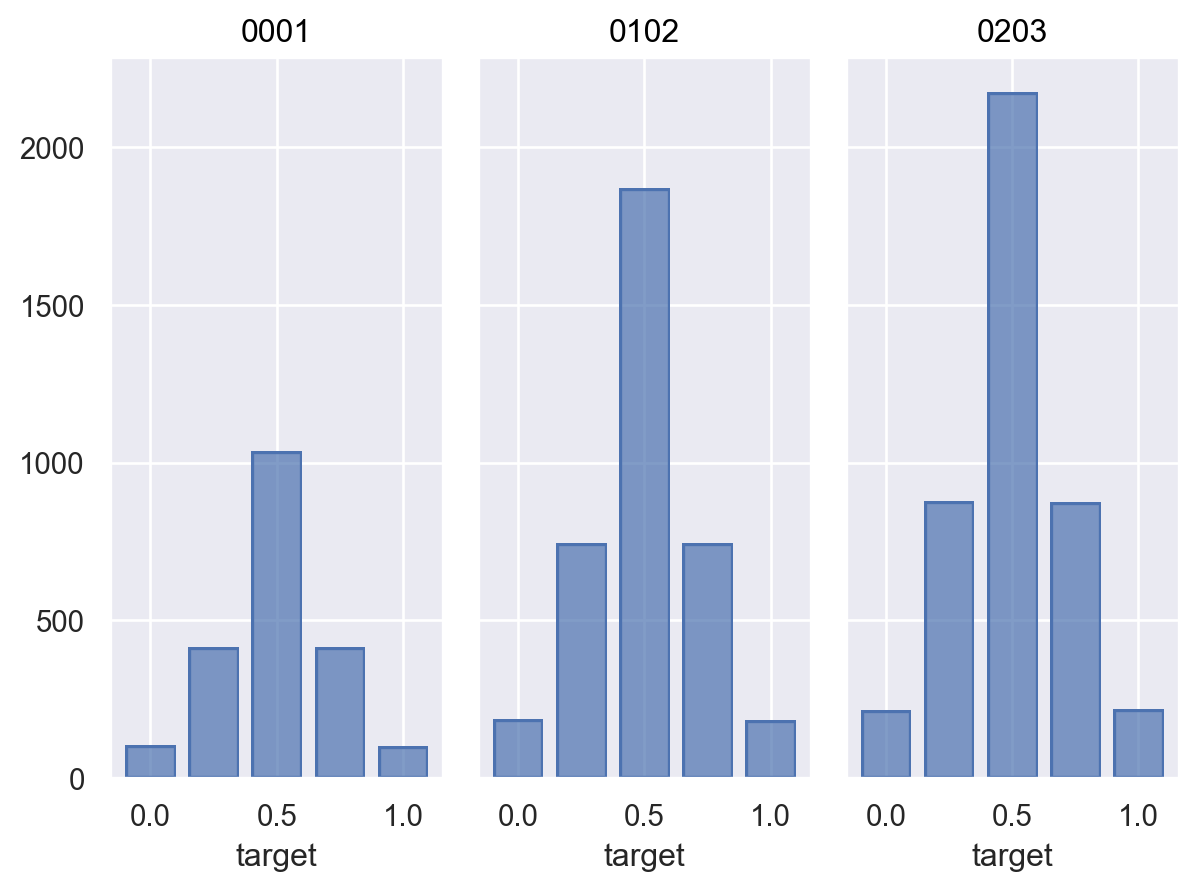

In [3]:
(
    so.Plot(train[(train.era == '0001') | (train.era == '0102') | (train.era == '0203')], x="target")
    .facet("era")
    .add(so.Bar(), so.Count())
)

In [4]:
# read the metadata and display
feature_metadata = json.load(open("../features.json"))
for metadata in feature_metadata:
  print(metadata, len(feature_metadata[metadata]))

feature_stats 2376
feature_sets 17
targets 41


In [5]:
features = feature_metadata["feature_sets"]["small"]

In [6]:
validation = pd.read_parquet("../validation_int8.parquet", columns=["era", "target", "data_type"])
validation = validation[validation["data_type"] == "validation"]
del validation["data_type"]
validation["meta_model"] = pd.read_parquet(
    "../meta_model.parquet"
)["numerai_meta_model"]

In [7]:
validation["prediction"] = 0.5 + np.random.normal(scale=0.0001, size=(validation.shape[0],))
# validation["prediction"] = validation["target"] + np.random.normal(scale=0.1, size=(validation.shape[0],))

In [8]:
# Compute the per-era corr between our predictions and the target values
per_era_corr = validation.groupby("era").apply(
    lambda x: numerai_corr(x[["prediction"]].dropna(), x["target"].dropna())
)

# Compute the per-era mmc between our predictions, the meta model, and the target values
per_era_mmc = validation.dropna().groupby("era").apply(
    lambda x: correlation_contribution(x[["prediction"]], x["meta_model"], x["target"])
)

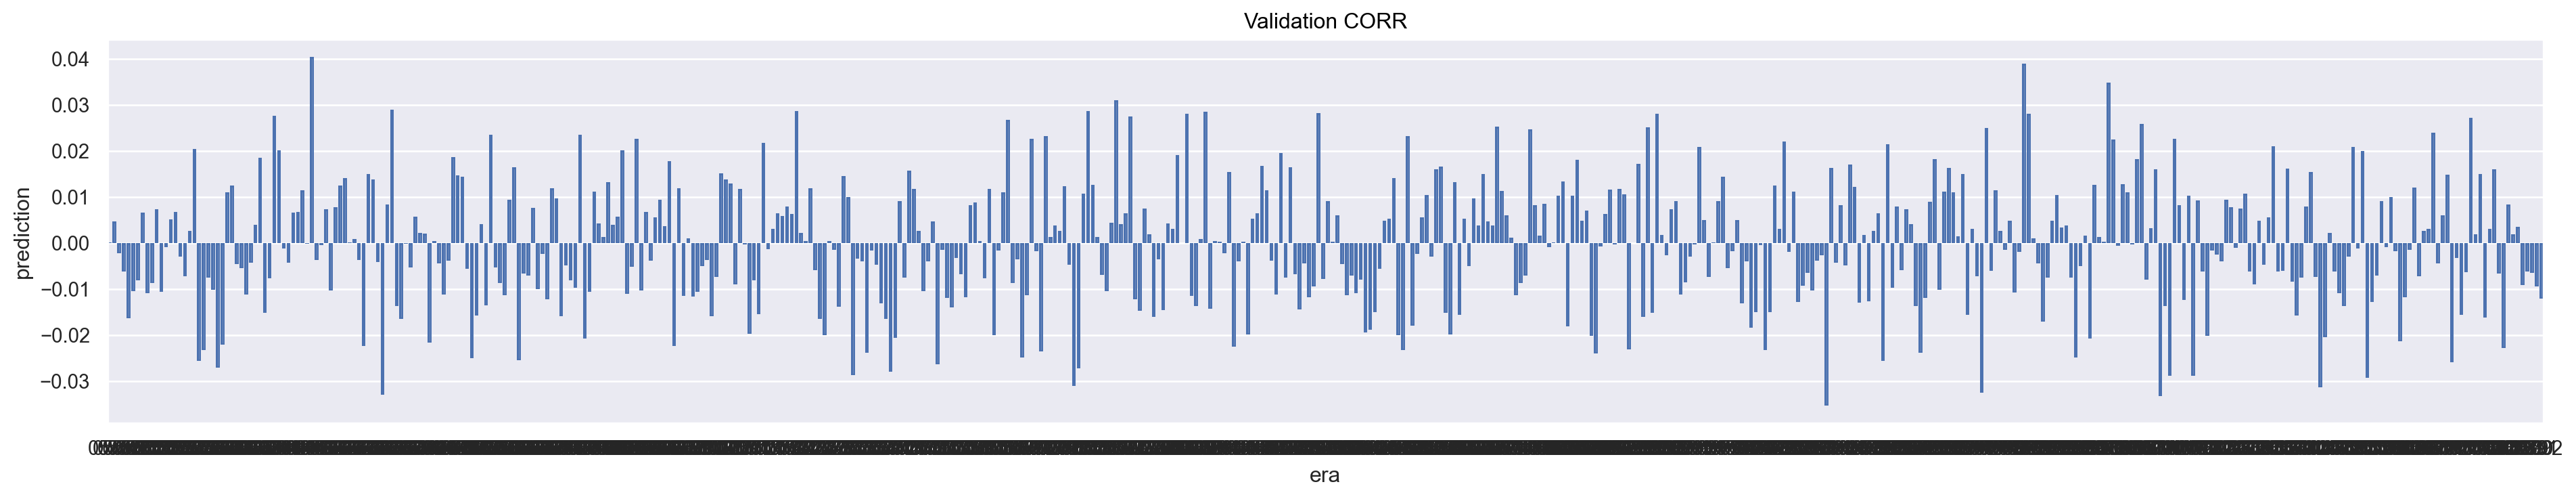

In [9]:
(
    so.Plot(per_era_corr, x="era", y="prediction")
    .add(so.Bar())
    .label(title="Validation CORR")
).layout(size=(20, 4))

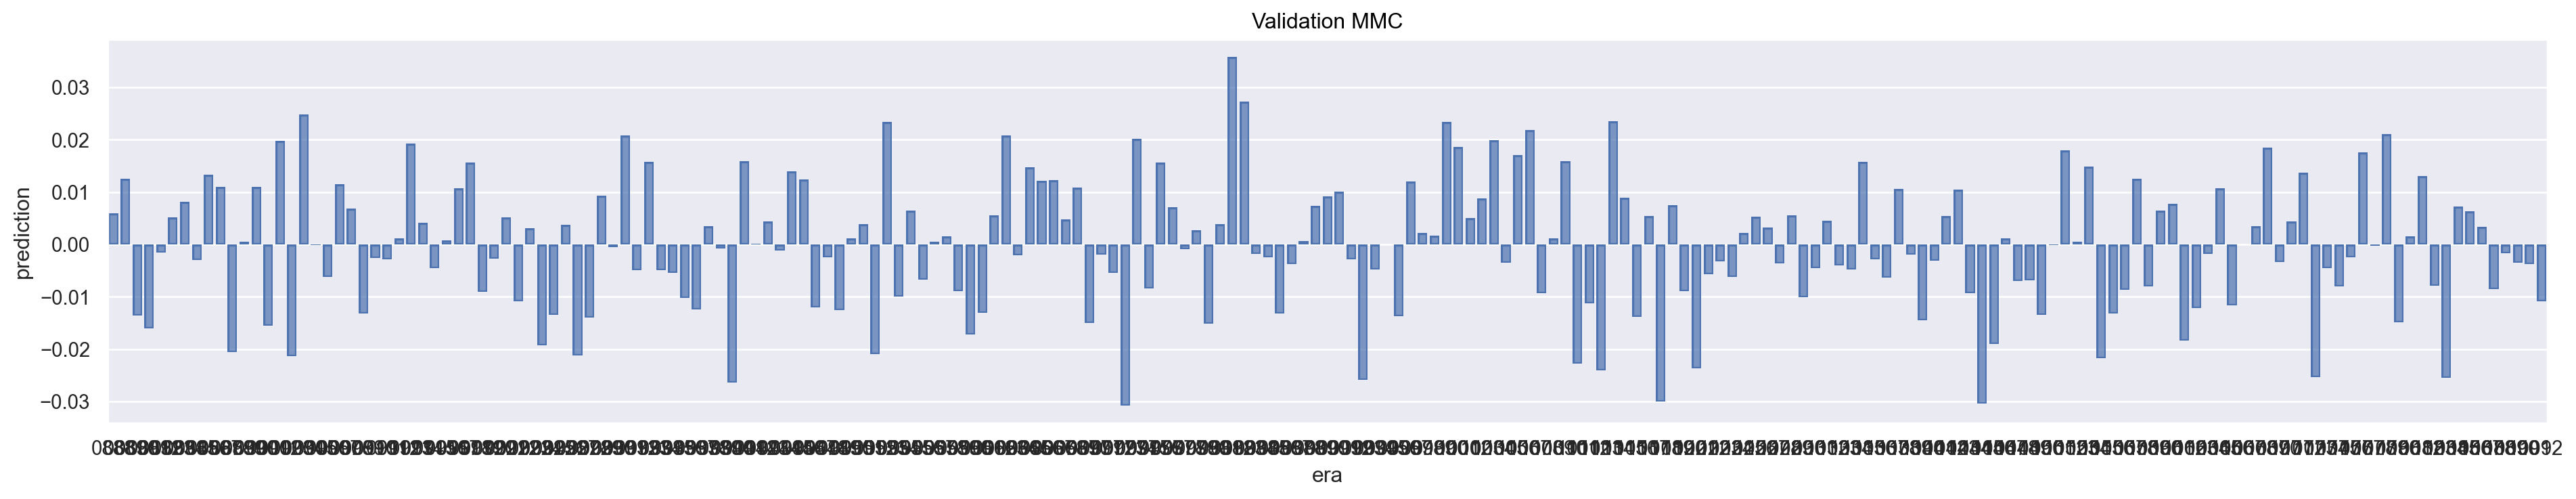

In [10]:
(
    so.Plot(per_era_mmc, x="era", y="prediction")
    .add(so.Bar())
    .label(title="Validation MMC")
).layout(size=(20, 4))

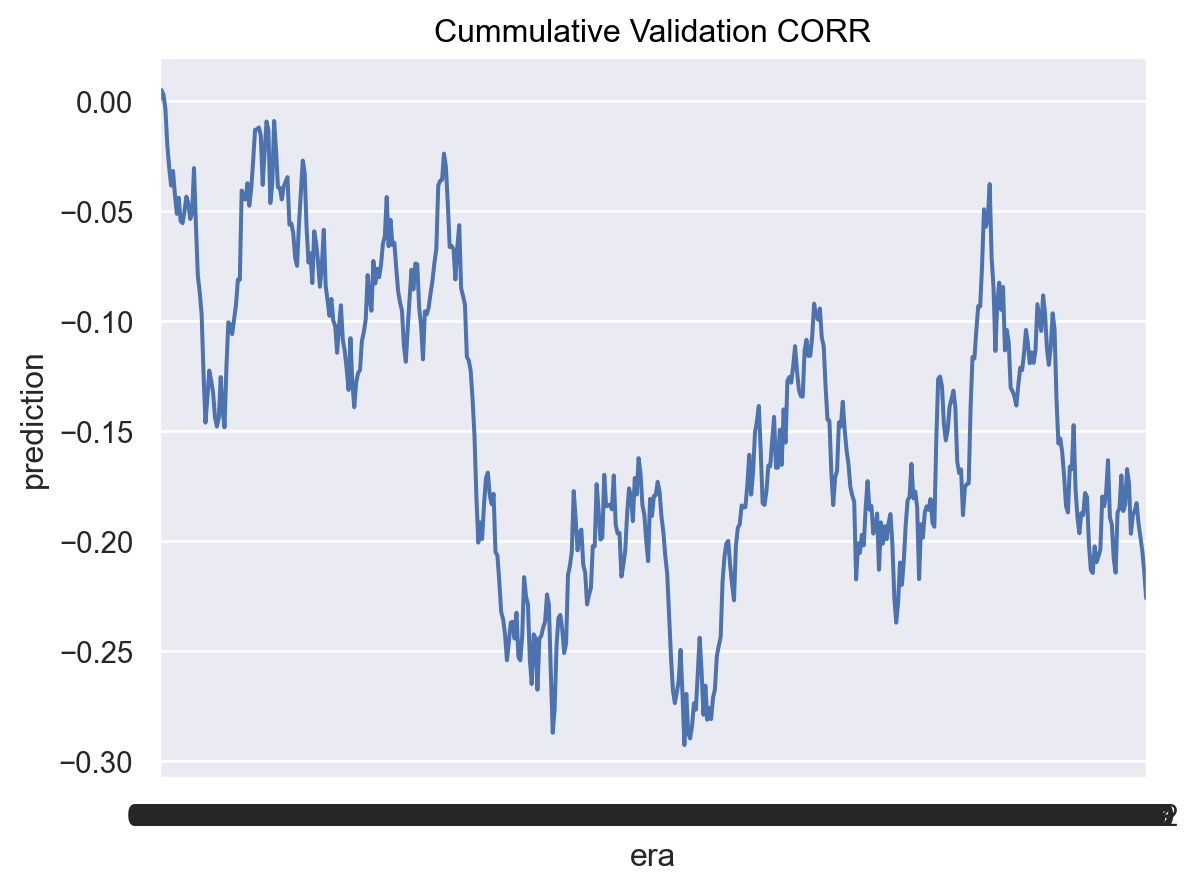

In [11]:
(
    so.Plot(per_era_corr.cumsum(), x="era", y="prediction")
    .add(so.Line())
    .label(title="Cummulative Validation CORR")
)

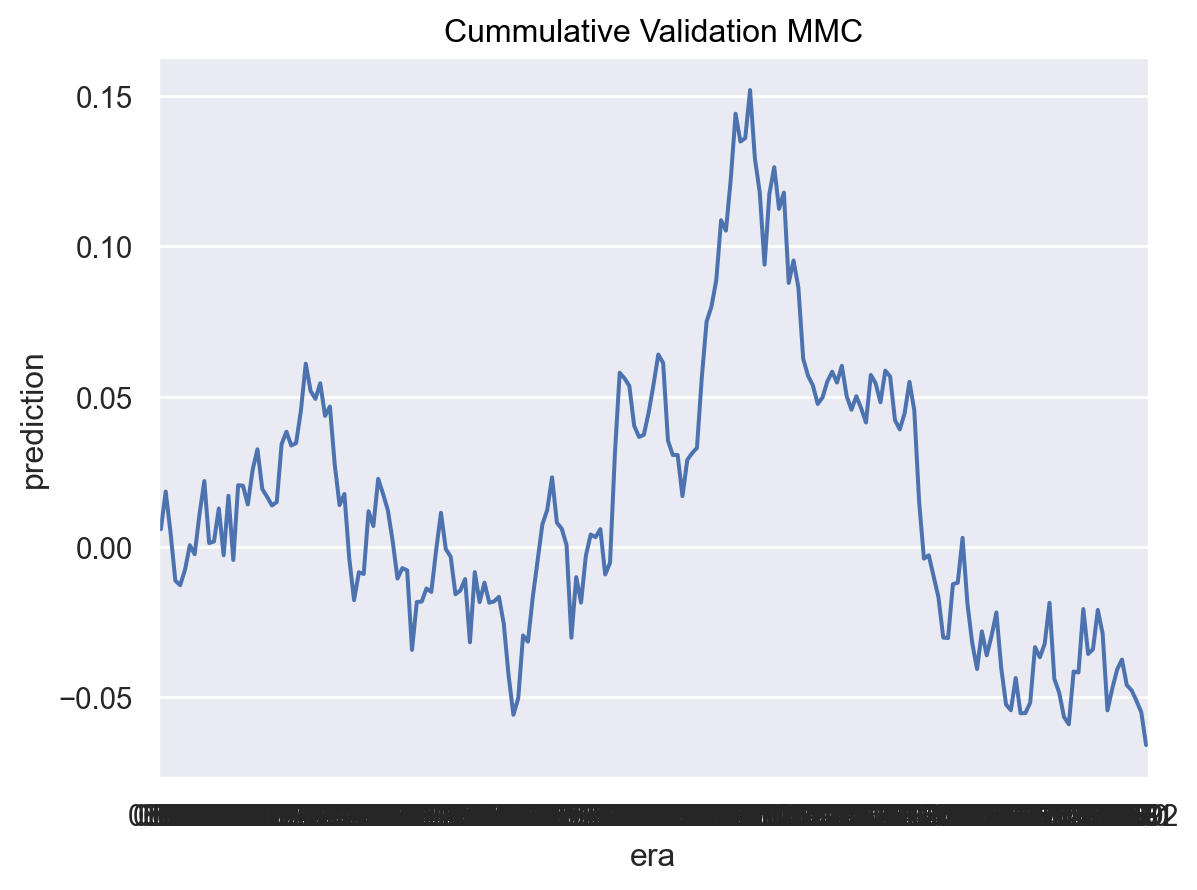

In [12]:
(
    so.Plot(per_era_mmc.cumsum(), x="era", y="prediction")
    .add(so.Line())
    .label(title="Cummulative Validation MMC")
)

In [39]:
train_data = train[train.era == '0001'][[features[0]]].astype(int)
train_data

,feature_acclimatisable_unfeigned_maghreb
id,
n003bba8a98662e4,0
n003bee128c2fcfc,2
n0048ac83aff7194,2
n00691bec80d3e02,1
n00b8720a2fdc4f2,0
...,...
nfe69fe104a5f738,3
nfe717abdac4977b,0
nfe91b60b73a2803,3


In [40]:
# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': train_data}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [41]:
from IPython.display import display, HTML
import base64
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))